In [4]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import pydot
import graphviz
import tensorflow as tf
from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras import metrics
import random
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import backend as K
from keras.layers import Dropout
%matplotlib inline
np.random.seed(10)
import math

In [5]:
input = []
output = []
for i in range(30,1000):

     data = random.sample(range(100), 30)
     data.sort()
     output.append([np.var(data)])
     mean = np.mean(data)


     input.append(list(data -mean))
        
        
print(input[0])
print(output[0])


[-45.06666666666667, -43.06666666666667, -41.06666666666667, -39.06666666666667, -36.06666666666667, -25.06666666666667, -23.06666666666667, -22.06666666666667, -19.06666666666667, -17.06666666666667, -16.06666666666667, -8.06666666666667, -7.06666666666667, -6.06666666666667, -2.06666666666667, -1.06666666666667, -0.066666666666669983, 1.93333333333333, 6.93333333333333, 14.93333333333333, 15.93333333333333, 20.93333333333333, 23.93333333333333, 24.93333333333333, 29.93333333333333, 33.93333333333333, 40.93333333333333, 43.93333333333333, 45.93333333333333, 46.93333333333333]
[774.79555555555567]


input data:
an array of 1000, with each group containing 30 random numbers from 1 to 100 (duplicate allowed)

output target data: 
a single number repersenting the variance

Plot: the error between the actual variance and the calculated variance

We will first try a single hidden layer with 30 nerual, using relu as the activation function

  Relu was chosen here because we are mapping from R^30 -> R

In [36]:
model = Sequential()
model.add(Dense(30,input_dim= 30, activation = "relu"))
for i in range(15):
    model.add(Dense(64,input_dim= 30, activation = "relu"))

model.add(Dense(1))
model.compile(loss='mse', optimizer = 'adam')

startime= time.time()
history_model = model.fit(input,output,epochs = 5000, batch_size = 512, verbose = 2, validation_split=0.2)
endtime = time.time()
print("time:")
print(endtime-starttime)



Train on 776 samples, validate on 194 samples
Epoch 1/5000
7s - loss: 678894.8847 - val_loss: 650436.7500
Epoch 2/5000
0s - loss: 678338.3196 - val_loss: 649306.4375
Epoch 3/5000
0s - loss: 676942.7545 - val_loss: 646598.0000
Epoch 4/5000
0s - loss: 673644.0580 - val_loss: 640238.0625
Epoch 5/5000
0s - loss: 665957.0773 - val_loss: 626155.9375
Epoch 6/5000
0s - loss: 649274.3144 - val_loss: 597080.8125
Epoch 7/5000
0s - loss: 614945.7835 - val_loss: 539790.6875
Epoch 8/5000
0s - loss: 548061.6450 - val_loss: 433340.4062
Epoch 9/5000
0s - loss: 426163.9836 - val_loss: 255872.6875
Epoch 10/5000
0s - loss: 229828.4111 - val_loss: 39898.0156
Epoch 11/5000
0s - loss: 31193.9107 - val_loss: 127612.1562
Epoch 12/5000
0s - loss: 137783.0387 - val_loss: 101487.6797
Epoch 13/5000
0s - loss: 74421.6354 - val_loss: 4074.5537
Epoch 14/5000
0s - loss: 6619.2773 - val_loss: 30964.1797
Epoch 15/5000
0s - loss: 41666.7697 - val_loss: 61628.6875
Epoch 16/5000
0s - loss: 67754.3341 - val_loss: 56182.8516

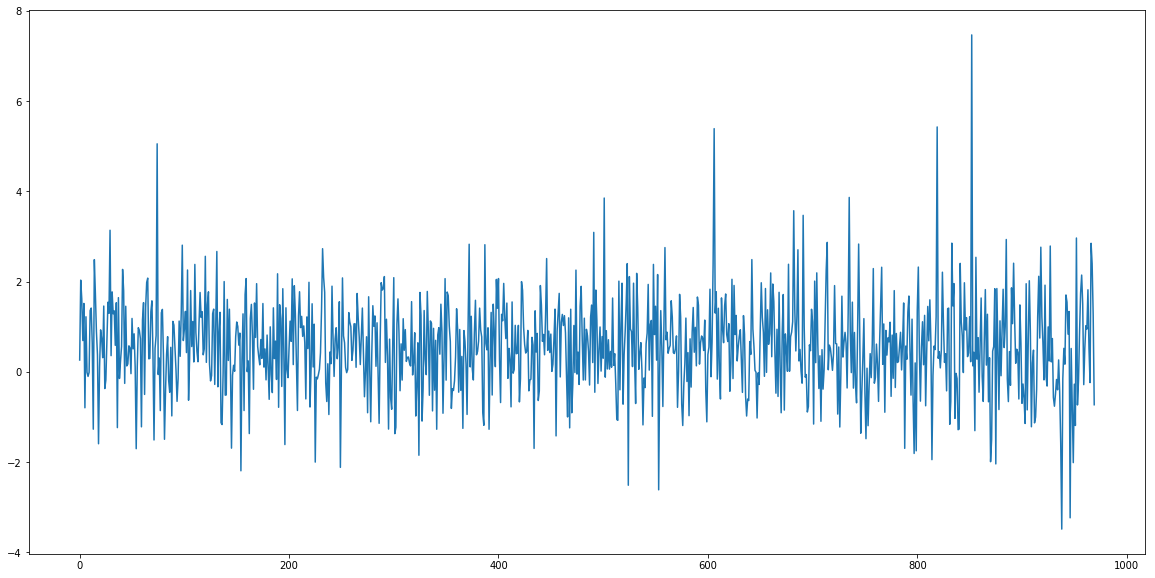

In [35]:
plt.figure(figsize=(20,10))
plt.plot(np.divide((output-model.predict(input)),output)*100)

In [31]:
test = np.array([random.sample(range(100), 30)])
test = test - np.mean(test)
test.sort()
print(test)

print(model.predict(test))
print(np.var(test))

[[-46.26666667 -45.26666667 -42.26666667 -40.26666667 -35.26666667
  -34.26666667 -31.26666667 -30.26666667 -27.26666667 -15.26666667
  -12.26666667 -11.26666667  -9.26666667  -8.26666667  -1.26666667
    2.73333333   5.73333333  10.73333333  12.73333333  16.73333333
   19.73333333  22.73333333  25.73333333  26.73333333  31.73333333
   36.73333333  38.73333333  40.73333333  48.73333333  49.73333333]]
[[ 868.09552002]]
885.462222222
